In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,precision_score
import re
import string
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

In [4]:
df=pd.read_csv(r"E:\cleaned_emotion_dataset.csv")
df

,text,emotion
0,Hands down. You are good. I mean smart good.,joy
1,Man!! I will never get used to these videos of...,surprise
2,"Man, you're brilliant!",surprise
3,Tumi koto study r research kore amder hasaccho...,joy
4,Joss,joy
...,...,...
486,thnx bro\n,joy
487,thnx bro\n,joy
488,tnx this news\n,joy
489,fuck bd education\n,disgust


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     491 non-null    object
 1   emotion  491 non-null    object
dtypes: object(2)
memory usage: 7.8+ KB


In [6]:
df.head()

,text,emotion
0,Hands down. You are good. I mean smart good.,joy
1,Man!! I will never get used to these videos of...,surprise
2,"Man, you're brilliant!",surprise
3,Tumi koto study r research kore amder hasaccho...,joy
4,Joss,joy


In [7]:
df.tail()

,text,emotion
486,thnx bro\n,joy
487,thnx bro\n,joy
488,tnx this news\n,joy
489,fuck bd education\n,disgust
490,haire chatroleeg\n,disgust


In [8]:
df.shape

(491, 2)

In [9]:
df.isnull().sum()

text       0
emotion    0
dtype: int64

In [10]:
df.columns

Index(['text', 'emotion'], dtype='object')

In [11]:
df=df.sample(frac=1)
#sample(frac=1) used for shuffling the dataset
#otherwise it will be biased during splitting train test
df

,text,emotion
184,Science hobeh Not Sience !!\n,surprise
148,"nabonita, you should give chance the speakers ...",disgust
420,Astir song\n,joy
211,This is to hurt for a student\n,disgust
316,why you always go to the black listed universi...,disgust
...,...,...
168,great news\n,joy
5,thanks a lot for your words bro,joy
427,Faria dance is the best\n,joy
357,Salute To Brave Leader\n,joy


In [12]:
def wordopt(text): #creating function to process text
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\S+|www\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    return text

<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Dell\AppData\Local\Temp\ipykernel_37864\1462576528.py:3: SyntaxWarning: invalid escape sequence '\['
  text=re.sub('\[.*?\]','',text)
C:\Users\Dell\AppData\Local\Temp\ipykernel_37864\1462576528.py:5: SyntaxWarning: invalid escape sequence '\S'
  text=re.sub('https?://\S+|www\.\S+','',text)
C:\Users\Dell\AppData\Local\Temp\ipykernel_37864\1462576528.py:9: SyntaxWarning: invalid escape sequence '\w'
  text=re.sub('\w*\d\w*','',text)


In [13]:
df["text"]=df["text"].apply(wordopt)
df

,text,emotion
184,science hobeh not sience,surprise
148,nabonita you should give chance the speakers ...,disgust
420,astir song,joy
211,this is to hurt for a student,disgust
316,why you always go to the black listed universi...,disgust
...,...,...
168,great news,joy
5,thanks a lot for your words bro,joy
427,faria dance is the best,joy
357,salute to brave leader,joy


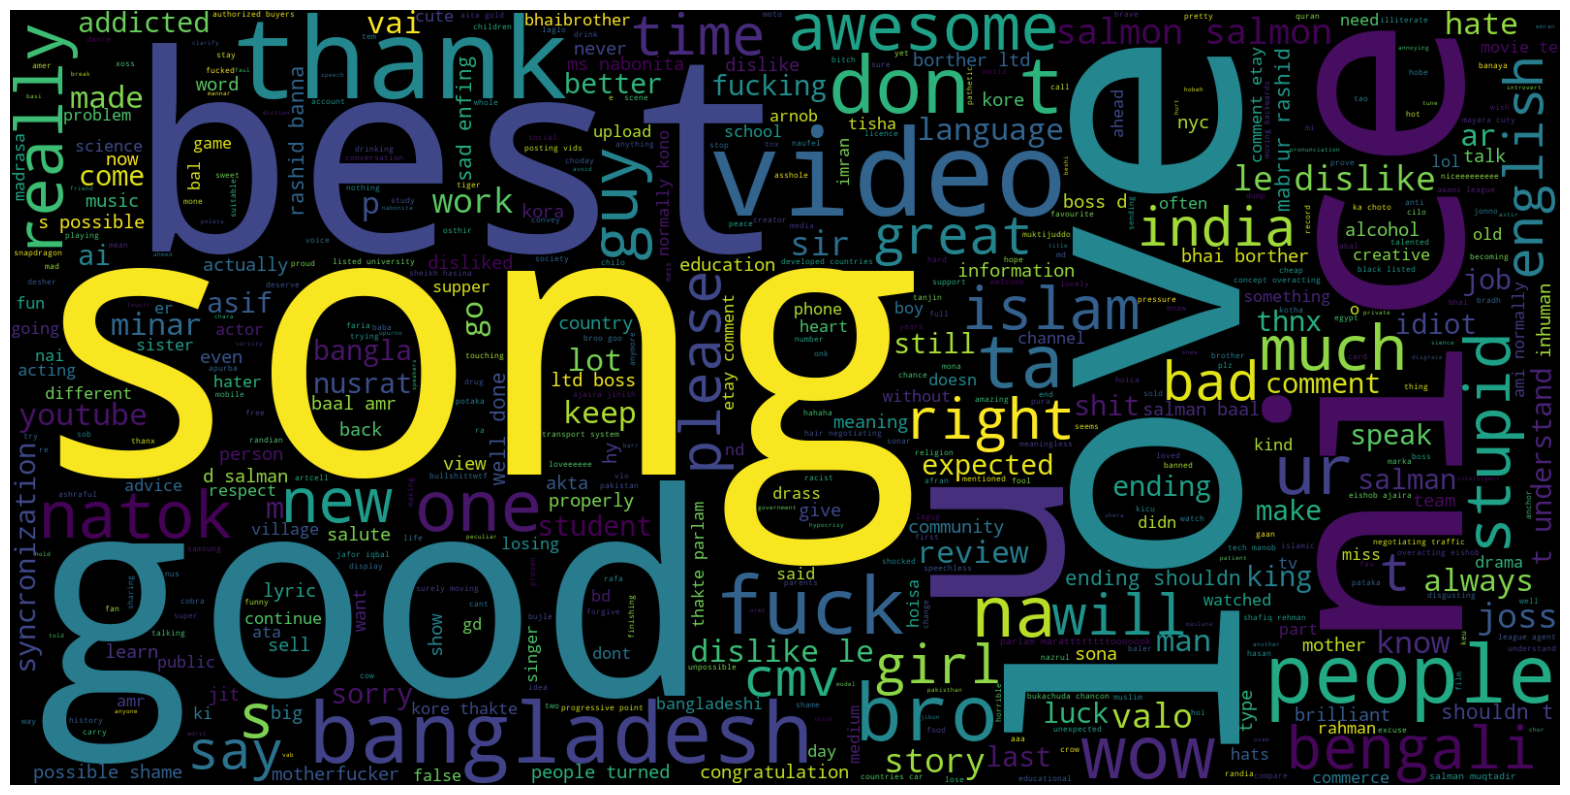

In [14]:
text=' '.join([word for word in df['text']])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud=WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:
x=df['text']
y=df['emotion']
print(x)
print(y)

184                         science hobeh not sience    
148    nabonita  you should give chance the speakers ...
420                                          astir song 
211                       this is to hurt for a student 
316    why you always go to the black listed universi...
                             ...                        
168                                          great news 
5                        thanks a lot for your words bro
427                             faria dance is the best 
357                              salute to brave leader 
74                  ethan robin  teo still shuntei achi 
Name: text, Length: 491, dtype: object
184    surprise
148     disgust
420         joy
211     disgust
316     disgust
         ...   
168         joy
5           joy
427         joy
357         joy
74          joy
Name: emotion, Length: 491, dtype: object


In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [17]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(368,) (123,) (368,) (123,)


In [18]:
vectorization=TfidfVectorizer()
xv_train=vectorization.fit_transform(x_train) #train-fit
xv_test=vectorization.transform(x_test)#test-tran

In [19]:
xv_train

<368x1135 sparse matrix of type '<class 'numpy.float64'>'
	with 2772 stored elements in Compressed Sparse Row format>

In [20]:
print(xv_train.shape,xv_test.shape)

(368, 1135) (123, 1135)


In [21]:
LR=LogisticRegression()
LR.fit(xv_train,y_train)
pred_lr1=LR.predict(xv_test)
pred_lr1

array(['joy', 'joy', 'joy', 'disgust', 'joy', 'joy', 'disgust', 'joy',
       'joy', 'joy', 'disgust', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy',
       'joy', 'joy', 'joy', 'disgust', 'joy', 'joy', 'joy', 'joy', 'joy',
       'joy', 'disgust', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy',
       'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'disgust', 'joy', 'joy',
       'disgust', 'joy', 'joy', 'joy', 'joy', 'joy', 'disgust', 'joy',
       'surprise', 'joy', 'joy', 'anger', 'joy', 'joy', 'joy', 'joy',
       'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy',
       'disgust', 'joy', 'joy', 'joy', 'disgust', 'disgust', 'joy', 'joy',
       'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'disgust', 'joy',
       'joy', 'joy', 'joy', 'joy', 'joy', 'disgust', 'anger', 'joy',
       'joy', 'anger', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy',
       'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy',
       'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy',

In [22]:
from sklearn.metrics import accuracy_score,f1_score

In [23]:
print(accuracy_score(y_test,pred_lr1))

0.5772357723577236


In [24]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(xv_train,y_train)
predict1 = MNB.predict(xv_test)
predict1

array(['joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy',
       'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy',
       'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy',
       'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy',
       'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy',
       'joy', 'joy', 'joy', 'joy', 'joy', 'disgust', 'joy', 'joy', 'joy',
       'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy',
       'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'disgust', 'joy', 'joy',
       'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy',
       'joy', 'joy', 'joy', 'disgust', 'joy', 'joy', 'joy', 'joy', 'joy',
       'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy',
       'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy',
       'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy',
       'joy', 'joy', 'joy', 'joy', 'joy', 'disgust'], dtype='<U8')

In [25]:
print(accuracy_score(y_test,predict1))

0.5121951219512195


In [26]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()
BNB.fit(xv_train,y_train)
predict3 = BNB.predict(xv_test)
predict3

array(['joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy',
       'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'disgust', 'joy', 'joy',
       'joy', 'joy', 'disgust', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy',
       'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy',
       'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy',
       'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy',
       'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy',
       'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'disgust', 'joy', 'joy',
       'disgust', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy',
       'joy', 'joy', 'joy', 'disgust', 'joy', 'joy', 'joy', 'joy', 'joy',
       'joy', 'joy', 'joy', 'joy', 'joy', 'disgust', 'joy', 'joy',
       'disgust', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy',
       'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy',
       'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'disgust'], dtype='<

In [27]:
print(accuracy_score(y_test,predict3))

0.5203252032520326


In [28]:
from sklearn.ensemble import GradientBoostingClassifier
GB= GradientBoostingClassifier()
GB.fit(xv_train,y_train)
ypred_gra1 = GB.predict(xv_test)
ypred_gra1


array(['joy', 'joy', 'sad', 'joy', 'joy', 'joy', 'joy', 'anger', 'joy',
       'joy', 'joy', 'joy', 'joy', 'joy', 'disgust', 'surprise', 'joy',
       'joy', 'surprise', 'joy', 'disgust', 'anger', 'joy', 'joy', 'joy',
       'joy', 'disgust', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy',
       'joy', 'anger', 'joy', 'joy', 'joy', 'joy', 'disgust', 'disgust',
       'joy', 'joy', 'joy', 'joy', 'disgust', 'anger', 'joy', 'joy',
       'joy', 'joy', 'surprise', 'joy', 'disgust', 'anger', 'joy', 'joy',
       'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'disgust', 'disgust',
       'joy', 'joy', 'joy', 'disgust', 'joy', 'joy', 'surprise',
       'disgust', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy',
       'joy', 'joy', 'surprise', 'anger', 'joy', 'anger', 'disgust',
       'joy', 'joy', 'disgust', 'anger', 'joy', 'joy', 'anger', 'joy',
       'joy', 'disgust', 'disgust', 'joy', 'joy', 'joy', 'joy', 'joy',
       'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy',
 

In [29]:
print(accuracy_score(y_test,ypred_gra1))


0.5934959349593496


In [30]:
pd.set_option('display.max_colwidth', None)

In [31]:
x.head()

184                                                                                                                     science hobeh not sience    
148    nabonita  you should give chance the speakers to clarify their speech and you should be patient and not break in anyone is not a mannar of a 
420                                                                                                                                      astir song 
211                                                                                                                   this is to hurt for a student 
316                                                                                               why you always go to the black listed university  
Name: text, dtype: object

In [32]:
y.head()

184    surprise
148     disgust
420         joy
211     disgust
316     disgust
Name: emotion, dtype: object

In [33]:
example = [''' thank u asif nazrul sir ''']
# Transform the example text
example_vectorized = vectorization.transform(example)
#Make predictions on the example data
result = LR.predict(example_vectorized)

print(result)

['joy']


In [34]:
example = ['''  here is a little hate  i do agree with  that asshole s  comment regarding you guys sounding like village cows who learned to speak english  the truth is that you two both grew up in bangladesh  and most likely attended english medium schools  and i know that salman was in australia for studies  now my question is how come you cannot speak either language with out mixing words  i was  when i moved to the us  i can speak english fluently without ever needing to utilize a bengali word to convey an idea  yet  when i try to speak bengali  my lack of education in that language is quite apparent because i have to rely on english to convey some words for which i do not possess the bengali vocabulary  i have an excuse for using english while speaking bengali  in that i only have a class  education in bengali  what is your excuse  why is it that you grow up in a country  and cannot properly speak the language of that country  ''']
# Transform the example text
example_vectorized = vectorization.transform(example)
#Make predictions on the example data
result = LR.predict(example_vectorized)

print(result)

['disgust']


In [68]:
example = [''' science hobeh not sience  ''']
# Transform the example text
example_vectorized = vectorization.transform(example)
#Make predictions on the example data
result = LR.predict(example_vectorized)

print(result)

['joy']
